In [16]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
%matplotlib notebook

<IPython.core.display.Javascript object>


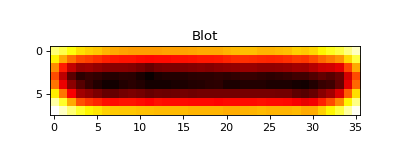

In [2]:
## Load in the test blot
test_blot = np.load("HOG_testblots/HOG_Blot.npy")
test_blot.shape

plt.figure(figsize = (5,2))
plt.imshow(test_blot, cmap="hot")
plt.title("Blot")

<IPython.core.display.Javascript object>


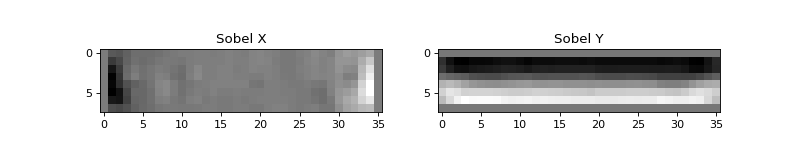

(<matplotlib.image.AxesImage at 0x71fc710>,
 <matplotlib.text.Text at 0x71d7dd8>)

In [17]:
## Claculate the gradient in x and y directions

gx = cv2.Sobel(test_blot, cv2.CV_64F, 1, 0 ,ksize = 1)
#gx = np.uint8(np.absolute(gx))
gy = cv2.Sobel(test_blot, cv2.CV_64F, 0, 1, ksize = 1)
#gy = np.uint8(np.absolute(gy))

mag, angle = cv2.cartToPolar(gx, gy, angleInDegrees=True)

f, ax = plt.subplots(1,2, figsize=(10,2))
ax[0].imshow(gx, cmap="gray"), ax[0].set_title("Sobel X")
ax[1].imshow(gy, cmap="gray"), ax[1].set_title("Sobel Y")


In [ ]:
def HOG(mag, angle, orientations=16):
    bin_width = 360 / orientations
    bins = [np.where(angle<((idx+1)*bin_width)) for idx in range(orientations)]
    oriented_mags = [np.sum(mag[b]) for b in bins]
    oriented_mags = np.hstack((np.array([oriented_mags[0]]), np.diff(oriented_mags)))
    
    return(oriented_mags)
        
        

In [ ]:
height = HOG(mag, angle)
norm = np.linalg.norm(height)
norm_height6 = height/norm

In [ ]:
plt.figure(figsize = (5,4))
plt.bar(range(16), norm_height6)
plt.xlabel("Orientation Bin")
plt.ylabel("Magnitude (L2 Normalized)")

In [ ]:
dist = np.linalg.norm(norm_height4-norm_height6)
print(dist)

In [3]:
sift = cv2.xfeatures2d.SIFT_create()
kp = sift.detect(test_blot, None)

In [15]:

#pts = np.float([kp[idx].pt for idx in len(kp)]).reshape(-1, 1, 2)


3

In [30]:
kernel_1D_1 = cv2.getGaussianKernel(21, 3)
kernel_1D_2 = cv2.getGaussianKernel(11, 3)
kernel_raw = np.sqrt(np.outer(kernel_1D_1, kernel_1D_2))
kernel = kernel_raw/kernel_raw.sum()

<IPython.core.display.Javascript object>


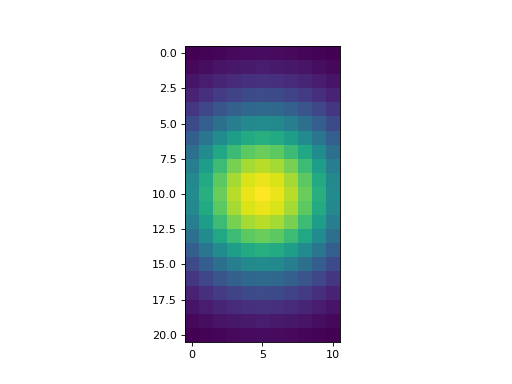

In [31]:
plt.figure()
plt.imshow(kernel)
